In [3]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
g<-read.graph("data/movie_graph.txt",format="ncol")

In [3]:
is_simple(g)

[1] TRUE

In [4]:
genreLines <- readLines("data/movieid_genre.txt")

In [5]:
addGenre = rep("null",vcount(g))

In [6]:
# taking 40 minutes
# adding genre infomation based on the movie id (not the node index)
for (i in 1:length(genreLines)){
    genreInfo <- strsplit(genreLines[i],"\t")
    movie_id <- genreInfo[[1]][1]
    #print (id)
    node_idx <- which(V(g)$name == movie_id)
    #print (node_idx)
    addGenre[node_idx] <- genreInfo[[1]][2]
}

In [7]:
V(g)$genre = addGenre

In [8]:
print (vcount(g))

[1] 203574


In [9]:
# ignore the nodes without genre
g2 <- delete_vertices(g, which(V(g)$genre == "null"))

In [10]:
print (vcount(g2))

[1] 179044


In [11]:
rm(g)
rm(addGenre)
save(g2,file='genre_graph.Rdata')

In [1]:
load(file='genre_graph.Rdata')

In [4]:
fc <- cluster_fast_greedy(g2)
print ("Fast Greedy Finished!")
#fast_greedy = fastgreedy.community(personal_network)

[1] "Fast Greedy Finished!"


In [5]:
save(fc,file='fc_result.Rdata')  
print ("Fast Greedy results write to the file!")

[1] "Fast Greedy results write to the file!"


In [15]:
com_mem <- membership(fc)
print(sprintf("Batman v Superman: Dawn of Justice (2016) membership: %d", com_mem[which(V(g2)$name == 12596)]))
print(sprintf("Mission: Impossible - Rogue Nation (2015) membership: %d",com_mem[which(V(g2)$name == 100855)]))
print(sprintf("Minions (2015) membership: %d",com_mem[which(V(g2)$name == 48390)]))

[1] "Batman v Superman: Dawn of Justice (2016) membership: 3"
[1] "Mission: Impossible - Rogue Nation (2015) membership: 3"
[1] "Minions (2015) membership: 3"


In [86]:
com_size <- sizes(fc)
print (com_size)
com_size[25][1]

Community sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
 5594 40987 41818 30226  8033  5865  4957  4158  3916  1395 11251  1915  9711 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 3191  1043  2104   288   443   469     2   790     9    14   407    17    10 
   27    28    29    30 
   18   317    74    22 


25 
17

In [31]:
# We choose the Community (3),5,8,9,10,14,15,17,19,25,28
# Save the Community info to the edgelist
save_community_el = function(i){
    Community = induced_subgraph(g2, fc[[i]])
    V(Community)$name <- as.numeric(fc[[i]])      ## To preserve original node numbers
    EL = as_edgelist(Community)
    FileName = paste0("./Community_data/Community", i, "_edgelist.dat")
    write.table(EL, FileName, row.names=FALSE, col.names=FALSE, sep="\t")
}


save_community_el(3)
save_community_el(5)
save_community_el(8)
save_community_el(9)
save_community_el(10)
save_community_el(14)
save_community_el(15)
save_community_el(17)
save_community_el(19)
save_community_el(25)
save_community_el(28)

### Plot the distribution of the genres 

In [45]:
plot_genre_dis = function (com_num){
    com = induced_subgraph(g2, fc[[com_num]])
    #print (V(com)$genre[1])
    genre_count = rep(0,28)
    genres=c(1:28)
    names(genres)=c("Adventure", "Reality-TV", "Film-Noir","Thriller","Crime","Comedy","Animation","Documentary","Drama",
                    "Western","Romance","Short","Mystery","Sport","Fantasy","Game-Show","Biography","Sci-Fi","Music","War",
                   "Horror","History","Adult","Talk-Show","Action","Musical","Family","News")
    for (i in 1:length(V(com))){
        genre_count[genres[c(V(com)$genre[i])]] = genre_count[genres[c(V(com)$genre[i])]] + 1
    }
    genre_fre = genre_count/vcount(com)

    plotName = paste0("Distribution of Community ", com_num)
    p<-barplot(genre_fre, main = plotName, xlab = "Genres", ylab = "Frequence", col = "blue",
            names.arg = names(genres), las = 3)
    #tmp <- as.vector(genre_fre) 
    #text(p, tmp, label = tmp)   
    }

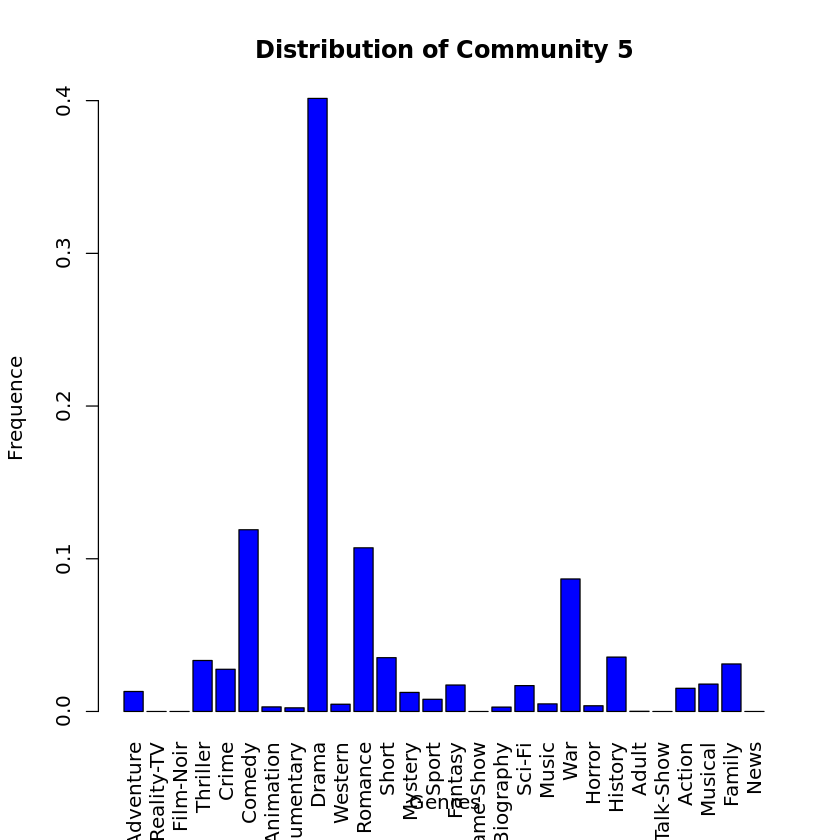

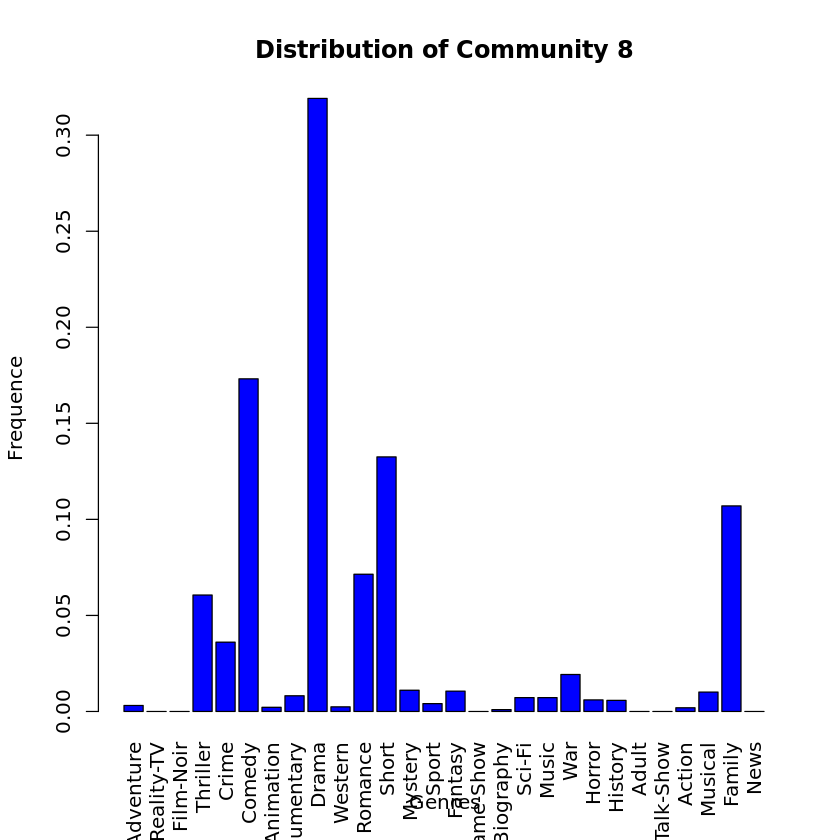

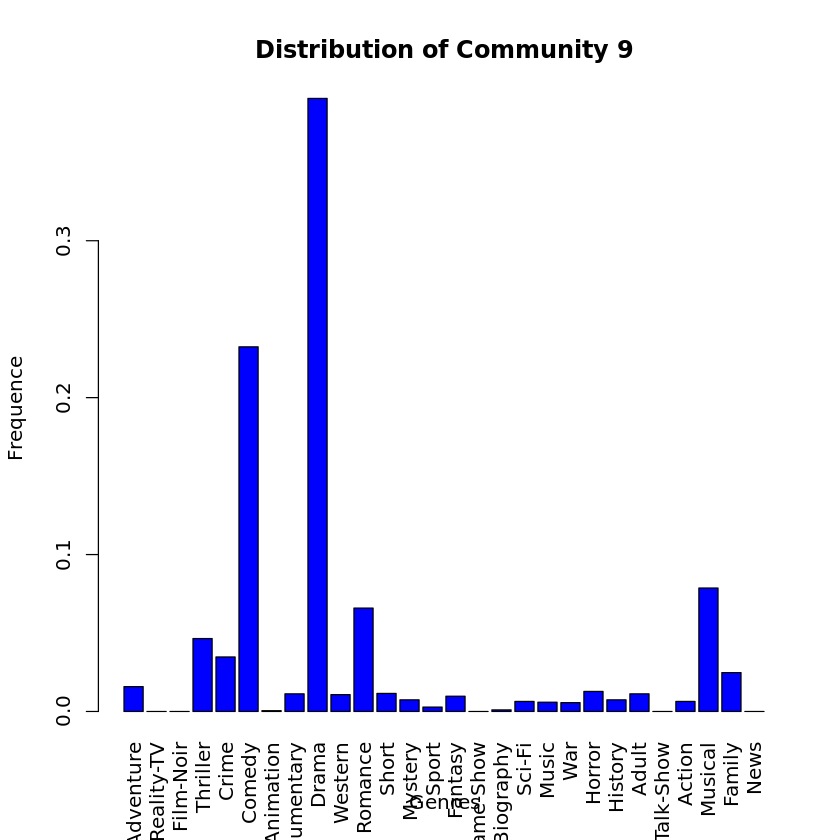

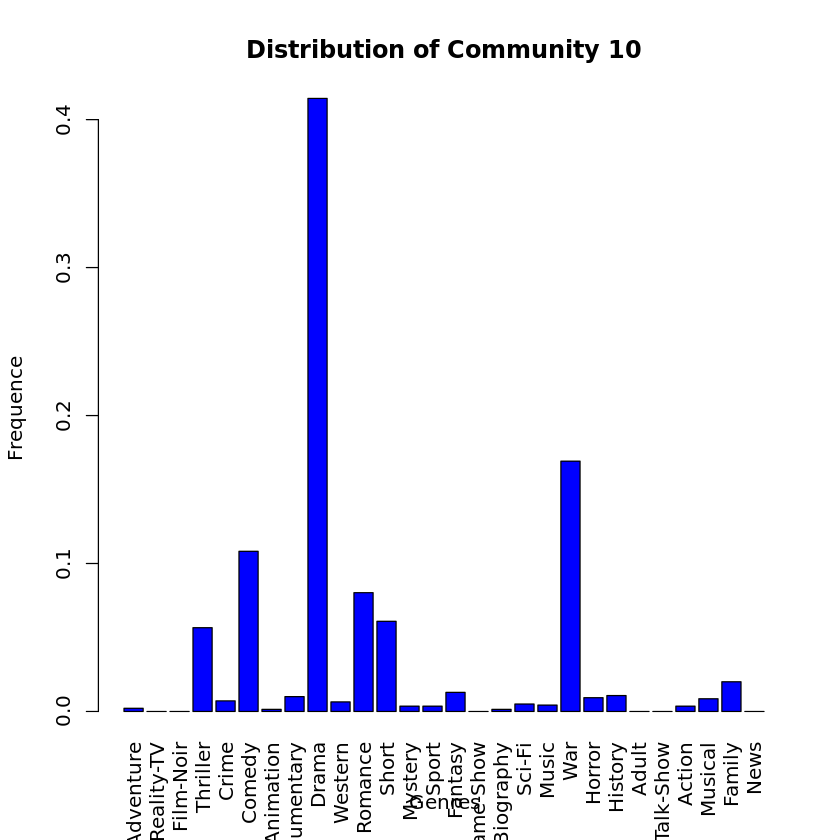

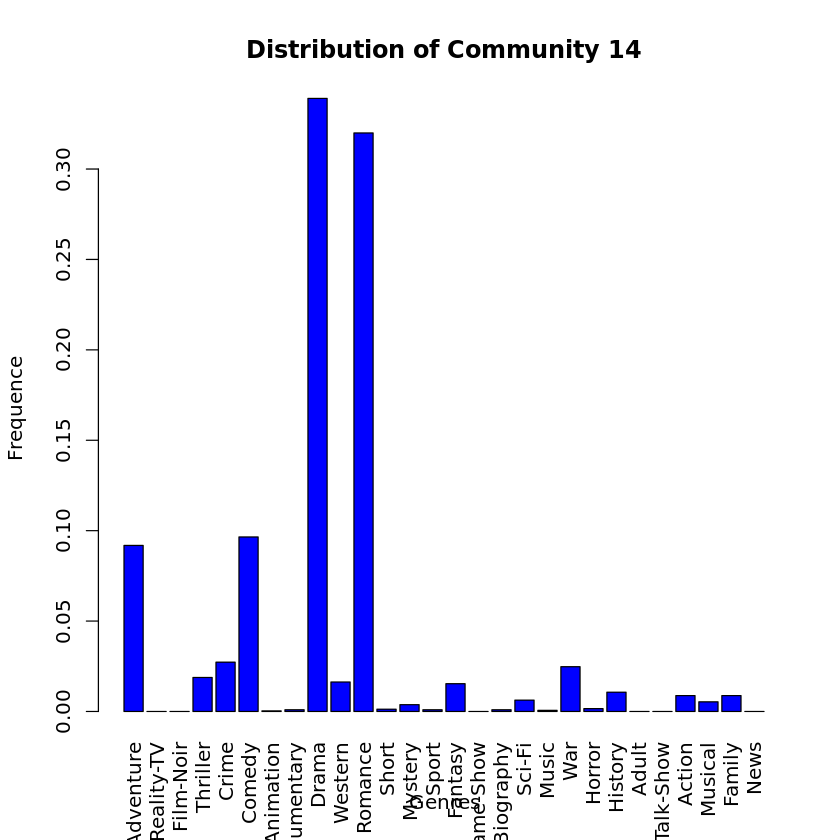

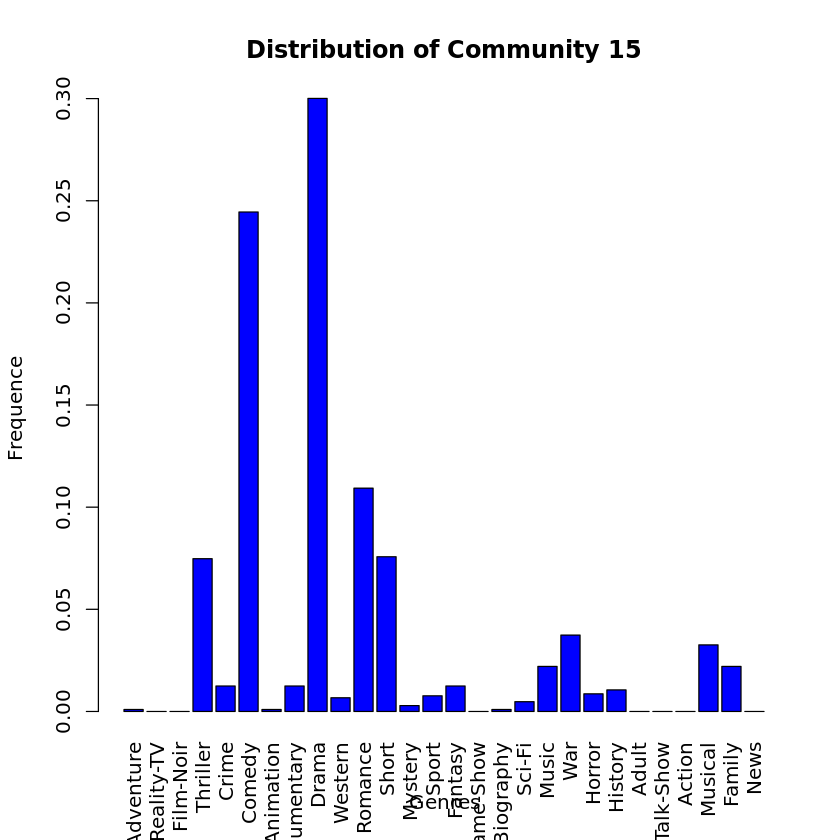

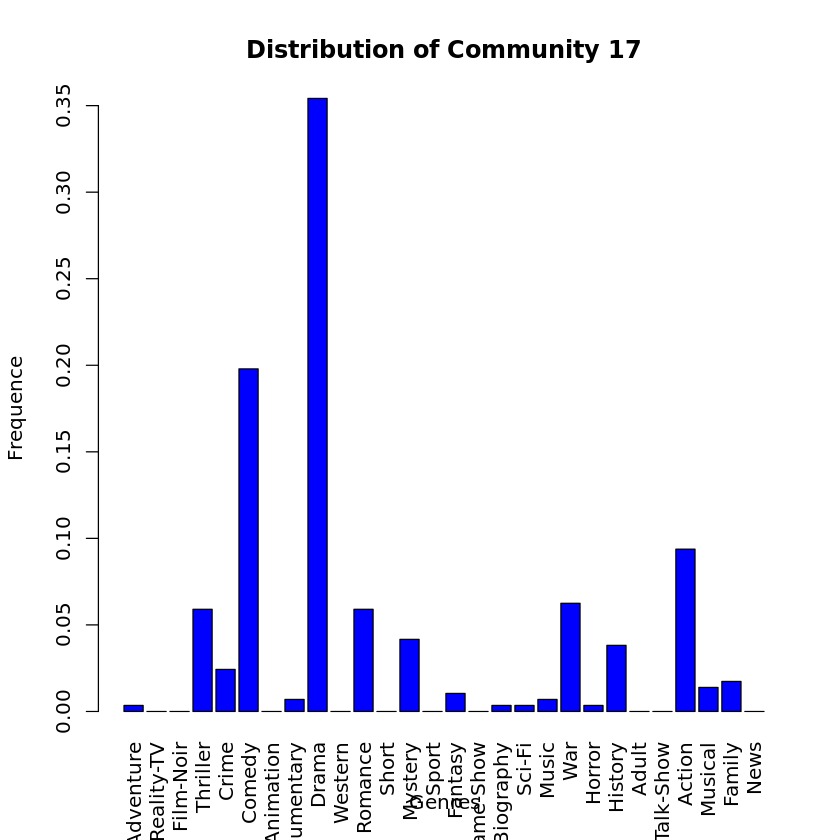

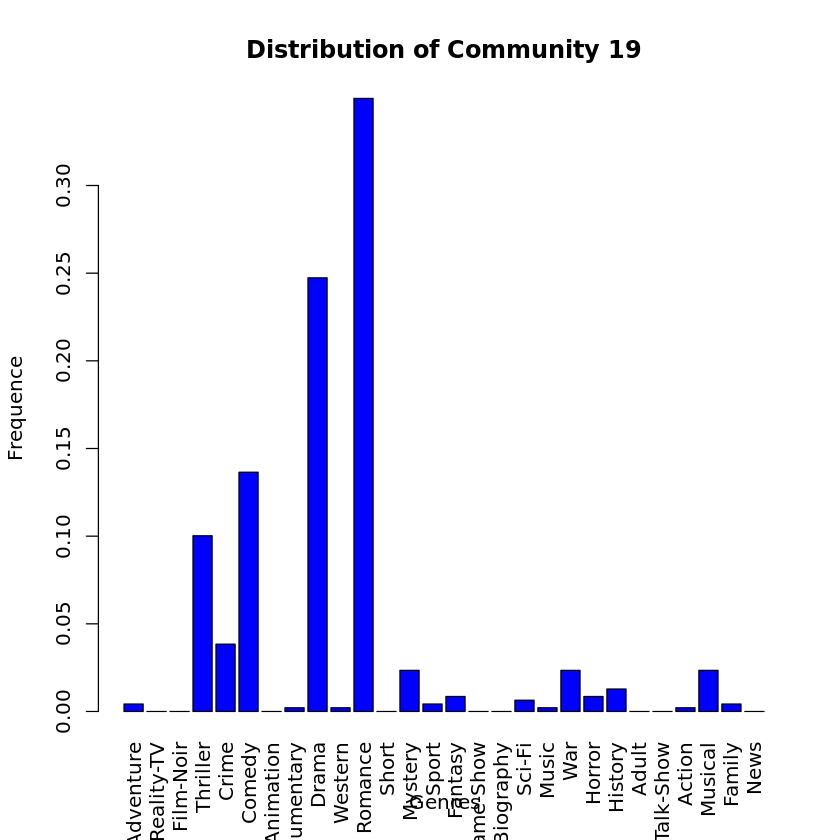

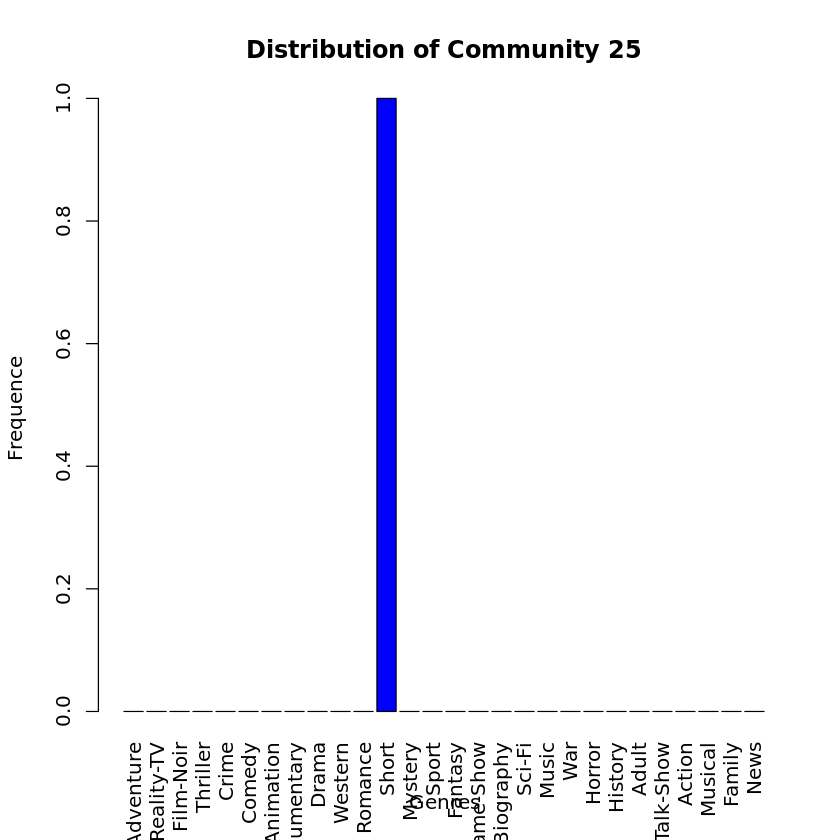

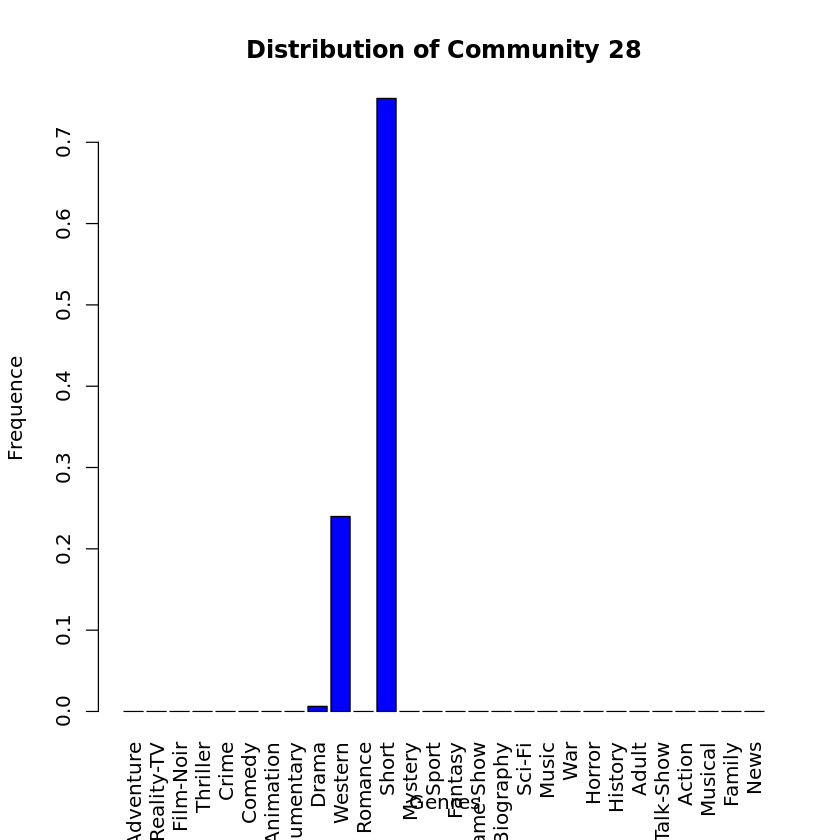

In [46]:
picked_com = c(5,8,9,10,14,15,17,19,25,28)
for (com_num in picked_com){
    plot_genre_dis(com_num)
}
    

## Question 8(a)

In [71]:
most_frequent_genre = function(com_num){
    com = induced_subgraph(g2, fc[[com_num]])
    #print (V(com)$genre[1])
    genre_count = rep(0,28)
    genres=c(1:28)
    names(genres)=c("Adventure", "Reality-TV", "Film-Noir","Thriller","Crime","Comedy","Animation","Documentary","Drama",
                    "Western","Romance","Short","Mystery","Sport","Fantasy","Game-Show","Biography","Sci-Fi","Music","War",
                   "Horror","History","Adult","Talk-Show","Action","Musical","Family","News")
    for (i in 1:length(V(com))){
        genre_count[genres[c(V(com)$genre[i])]] = genre_count[genres[c(V(com)$genre[i])]] + 1
    }
    genre_fre = genre_count/vcount(com)
    max_genre_fre = max(genre_fre)
    max_genre = which(genre_fre == max_genre_fre)
    cat("Most Dominant Genres in Community ", com_num, " is ", names(genres)[max_genre], ",with frequency",max_genre_fre,"\n")
    return (genre_fre)
}

In [76]:
p = array(rep(0,30*28),c(30,28))
for (com_num in 1:30){
    p[com_num, ] = most_frequent_genre (com_num)
    }

Most Dominant Genres in Community  1  is  Drama ,with frequency 0.43064 
Most Dominant Genres in Community  2  is  Short ,with frequency 0.2728182 
Most Dominant Genres in Community  3  is  Thriller ,with frequency 0.19054 
Most Dominant Genres in Community  4  is  Drama ,with frequency 0.3028518 
Most Dominant Genres in Community  5  is  Drama ,with frequency 0.4014689 
Most Dominant Genres in Community  6  is  Drama ,with frequency 0.314578 
Most Dominant Genres in Community  7  is  Adult ,with frequency 0.431511 
Most Dominant Genres in Community  8  is  Drama ,with frequency 0.3191438 
Most Dominant Genres in Community  9  is  Drama ,with frequency 0.3907048 
Most Dominant Genres in Community  10  is  Drama ,with frequency 0.4143369 
Most Dominant Genres in Community  11  is  Drama ,with frequency 0.3067283 
Most Dominant Genres in Community  12  is  Drama ,with frequency 0.2966057 
Most Dominant Genres in Community  13  is  Drama ,with frequency 0.2780352 
Most Dominant Genres in 

In [77]:
print(p)

              [,1]         [,2]         [,3]        [,4]        [,5]       [,6]
 [1,] 0.0053628888 0.0000000000 1.787630e-04 0.063103325 0.033607437 0.11994995
 [2,] 0.0127357455 0.0000000000 5.294362e-03 0.038573206 0.010759509 0.07380389
 [3,] 0.0104739586 0.0001434789 2.391315e-05 0.190539959 0.014228323 0.08725908
 [4,] 0.0163104612 0.0000992523 9.925230e-05 0.073248197 0.026037187 0.21620459
 [5,] 0.0130710818 0.0000000000 0.000000e+00 0.033362380 0.027636001 0.11900909
 [6,] 0.0063086104 0.0000000000 0.000000e+00 0.115771526 0.008525149 0.12020460
 [7,] 0.0028242889 0.0002017349 0.000000e+00 0.082711317 0.012507565 0.09582409
 [8,] 0.0031265031 0.0000000000 0.000000e+00 0.060606061 0.036075036 0.17316017
 [9,] 0.0158324821 0.0000000000 0.000000e+00 0.046475996 0.034729316 0.23237998
[10,] 0.0021505376 0.0000000000 0.000000e+00 0.056630824 0.007168459 0.10824373
[11,] 0.0382188250 0.0000000000 0.000000e+00 0.060972358 0.018131722 0.13589903
[12,] 0.0078328982 0.0000000000 0.000000

### The most frequent dominant ones across communities 

In [90]:
c = array(rep(0,30*28),c(30,28))
for (com_num in 1:30){
    c[com_num, ] = p[com_num, ] * vcount(induced_subgraph(g2, fc[[com_num]]))
}

In [108]:
print (c[20,])

 [1] 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [92]:
q = rep(0,28)
movie_total = sum(c)
for (i in 1:28)
    q[i] = sum(c[,i]) 

In [93]:
q = q/movie_total

In [96]:
names(genres)=c("Adventure", "Reality-TV", "Film-Noir","Thriller","Crime","Comedy","Animation","Documentary","Drama",
                    "Western","Romance","Short","Mystery","Sport","Fantasy","Game-Show","Biography","Sci-Fi","Music","War",
                   "Horror","History","Adult","Talk-Show","Action","Musical","Family","News")
max_q = max(q)
max_genre = which(q == max_q)
cat("Most Dominant Genre in across communities is ", names(genres)[max_genre], ",with frequency",max_q,"\n")

Most Dominant Genre in across communities is  Drama ,with frequency 0.2584951 


In [94]:
print (q)

 [1] 1.399097e-02 6.143741e-05 1.239919e-03 9.196064e-02 1.805701e-02
 [6] 1.221767e-01 2.317866e-03 1.205849e-02 2.584951e-01 4.262081e-02
[11] 1.054210e-01 1.197359e-01 1.724157e-02 9.595407e-03 1.578383e-02
[16] 3.909653e-05 9.383168e-04 2.089989e-02 8.411340e-03 2.799870e-02
[21] 2.219566e-02 9.656844e-03 1.523089e-02 2.792610e-05 2.368691e-02
[26] 2.009562e-02 1.982194e-02 2.401644e-04


## Question 8(b) 

In [98]:
score = array(rep(0,30*28),c(30,28))

In [104]:
for (j in 1:30){ # jth community
    for (i in 1:28){ # ith genre
        if (c[j,i] == 0)
            score[j,i] = 0
        else
            score[j,i] = log(c[j,i])*p[j,i]/q[i]
    }
}

In [109]:
print (score[20, ])

 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [113]:
for (j in 1:30){
    max_score = max(score[j, ])
    max_genre = which(score[j, ] == max_score)
    if (j == 20)
        cat ("Not Applicable in this community!\n")
    else
        cat("Most Dominant Genre in Community ", j, " is ", names(genres)[max_genre], ",with score",max_score,"\n")
}

Most Dominant Genre in Community  1  is  Drama ,with score 12.9727 
Most Dominant Genre in Community  2  is  Western ,with score 27.36364 
Most Dominant Genre in Community  3  is  Animation ,with score 18.90395 
Most Dominant Genre in Community  4  is  Comedy ,with score 15.54586 
Most Dominant Genre in Community  5  is  History ,with score 20.85268 
Most Dominant Genre in Community  6  is  Musical ,with score 13.89433 
Most Dominant Genre in Community  7  is  Adult ,with score 217.2471 
Most Dominant Genre in Community  8  is  Family ,with score 32.92471 
Most Dominant Genre in Community  9  is  Musical ,with score 22.42688 
Most Dominant Genre in Community  10  is  War ,with score 33.01393 
Most Dominant Genre in Community  11  is  Action ,with score 38.0867 
Most Dominant Genre in Community  12  is  Fantasy ,with score 14.1292 
Most Dominant Genre in Community  13  is  Family ,with score 26.30892 
Most Dominant Genre in Community  14  is  Adventure ,with score 37.27815 
Most Dominan

### Question 8(c) 

In [114]:
# using the community 23, size = 14
save_community_el(23)

In [116]:
com23 = induced_subgraph(g2, fc[[23]])

In [118]:
V(com23)

+ 14/14 vertices, named, from ae3d9f7:
 [1] 139084 139078 139086 139079 139074 139810 139075 48206  139083 139080
[11] 139811 139081 229416 139085